# Assignment performed by:

## Name: SONGA MUGABE Fabrice

# Link: https://github.com/fafasonga/advstat-labs

In [103]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Assignment 1

# Loading Datasets

In [14]:
data1 = pd.read_csv("./ds-boot-2.csv", sep='\t')

In [15]:
data1.head()

,id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
0,11,6.48148,3.0,5.0,7.75000,0.0,7.16667,8.16667,9.66667,6.16667,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
1,12,5.74074,4.0,8.0,7.33333,8.0,8.83333,9.75000,9.66667,9.00000,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
2,25,7.59259,7.0,8.0,7.66667,8.0,9.66667,9.50000,6.16667,9.66667,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12
3,31,5.96297,4.0,8.0,9.33333,10.0,9.33333,7.00000,8.50000,9.66667,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,6.25,8.93,1.82,6.41
4,48,5.44444,1.0,3.5,6.41667,9.0,8.50000,7.08333,6.33333,9.00000,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,3.00,8.08,1.36,3.67


# Estimating Mean, Median, Error and confidence Interval

In [16]:
def bootstrap(X, B=1000, s=np.mean):
    sample = np.random.choice(X, size=(B, len(X)))
    estimations = s(sample, axis=1)
    est = estimations.mean()
    error = (((estimations - est) ** 2).sum() / (B - 1)) ** 0.5
    conf_int = np.percentile(estimations, [2.5, 97.5])
    return est, error, conf_int

In [19]:
print(bootstrap(data1['y1'], s=np.mean))

(4.0254124999999998, 0.43989813760143975, array([ 3.1996875,  4.8503125]))


In [20]:
print(bootstrap(data1['y1'], s=np.median))

(4.0054999999999996, 0.54407330918339103, array([ 3.,  6.]))


In [25]:
target = ['y1', 'y2', 'y3', 'y4', 'y5']

In [29]:
for label in target:
    print(label, 'mean:', bootstrap(data1[label], s=np.mean))
    print(label, 'meadian:', bootstrap(data1[label], s=np.median))

('y1', 'mean:', (4.0225625000000003, 0.44275302945190437, array([ 3.1371875,  4.9003125])))
('y1', 'meadian:', (4.0182500000000001, 0.53783706287890409, array([ 3.,  6.])))
('y2', 'mean:', (5.5227937499999999, 0.53026086267130679, array([ 4.4809375,  6.5753125])))
('y2', 'meadian:', (6.1651249999999997, 0.66438657338472307, array([ 4.625,  7.25 ])))
('y3', 'mean:', (7.3128430000000009, 0.45754116825335689, array([ 6.35858125,  8.11305625])))
('y3', 'meadian:', (8.3044249999999984, 0.27978818023783802, array([ 7.96,  8.92])))
('y4', 'mean:', (1.5286759999999999, 0.10993528398865246, array([ 1.29313125,  1.72755   ])))
('y4', 'meadian:', (1.8497199999999998, 0.13321399163589226, array([ 1.64,  2.  ])))
('y5', 'mean:', (5.6435752499999996, 0.45151077922757971, array([ 4.7133125 ,  6.55406875])))
('y5', 'meadian:', (6.1481299999999992, 0.44503872029584418, array([ 5.09   ,  7.04625])))


# Linear Reagression of Initial Sample

In [31]:
features = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']

In [34]:
for label in target:
    model = LinearRegression()
    model.fit(data1[features], data1[label])
    print(label, model.coef_)

('y1', array([ 0.19590832,  0.29677494, -0.18401943,  0.02210887,  0.13189801,
        0.28986106]))
('y2', array([ 0.12744323,  0.18071353,  0.03383592,  0.10825791, -0.05377676,
        0.57520423]))
('y3', array([ 0.15867643,  0.01838332,  0.12772208,  0.29122447,  0.17922699,
        0.23654851]))
('y4', array([-0.00486422,  0.00423981,  0.11801823,  0.02819031,  0.06902863,
        0.00098964]))
('y5', array([ 0.152759  ,  0.16444265,  0.01372641,  0.1348942 ,  0.10091446,
        0.34552193]))


In [41]:
''' returns estimations of coefficients (with intercept) and 95% confidence intervals'''

' returns estimations of coefficients (with intercept) and 95% confidence intervals'

In [46]:
def coeffs_bootstrap(X, Y, B=1000, model_class=LinearRegression):
    
    n = X.shape[0]
    coeffs = []
    for b in range(B):
        model = model_class()
        idx = np.random.randint(n, size=n)
        model.fit(X.as_matrix()[idx, :], Y.as_matrix()[idx])
        coeffs.append(np.append(model.coef_, model.intercept_))
    coeffs = np.array(coeffs)
    conf_int = np.percentile(coeffs, [2.5, 97.5], axis=0)
    return coeffs.mean(axis=0), conf_int


for label in targets:
    coeffs, intervals = coeffs_bootstrap(data1[features], data1[label])
    print(label,
          'coef', coeffs[:-1], 'inpt', coeffs[-1],
          'from', intervals[0][:-1], '    ', intervals[0][-1],
          'to  ', intervals[1][:-1], '    ', intervals[1][-1])

('y1', 'coef', array([ 0.22463472,  0.28980205, -0.10382083,  0.08125146,  0.11644295,
        0.15215769]), 'inpt', -0.41910306506748296, 'from', array([ -1.40856474e-01,  -2.29086371e-04,  -5.63793913e-01,
        -4.16708187e-01,  -4.28611544e-01,  -6.51422751e-01]), '    ', -1.5770405968985788, 'to  ', array([ 0.64207573,  0.56339271,  0.45155496,  0.63688043,  0.50980624,
        0.63016197]), '    ', 0.19862459178211342)
('y2', 'coef', array([ 0.12663644,  0.1667847 ,  0.12882126,  0.15719443, -0.05688789,
        0.4505047 ]), 'inpt', -0.57658408788651783, 'from', array([-0.33377816, -0.17864577, -0.47830489, -0.30100218, -0.5197511 ,
       -0.40707145]), '    ', -1.8721329917677563, 'to  ', array([ 0.62772802,  0.51895294,  0.9030343 ,  0.61496594,  0.32975561,
        0.89073681]), '    ', 0.044147174173777975)
('y3', 'coef', array([ 0.14284834,  0.02293654,  0.10997328,  0.29424803,  0.19422908,
        0.25047633]), 'inpt', 0.59394802278581382, 'from', array([-0.02319219, -

# Assignment 2

# Loading Datasets

In [65]:
data2 = pd.read_csv("./ds-boot-1.csv", sep='\t')

In [66]:
data2

,day,bugsPerDay,cummBugs
0,1,0,0
1,2,1,1
2,3,0,1
3,4,2,3
4,5,1,4
5,6,0,4
6,7,0,4
7,8,0,4
8,9,0,4
9,10,0,4


In [67]:
data2.head()

,day,bugsPerDay,cummBugs
0,1,0,0
1,2,1,1
2,3,0,1
3,4,2,3
4,5,1,4


In [68]:
data2.describe()

,day,bugsPerDay,cummBugs
count,1327.000000,1327.000000,1327.000000
mean,664.000000,4.212509,2894.581763
std,383.216214,8.803797,2013.662007
min,1.000000,0.000000,0.000000
25%,332.500000,0.000000,765.000000
50%,664.000000,2.000000,3186.000000
75%,995.500000,6.000000,4994.500000
max,1327.000000,224.000000,5590.000000


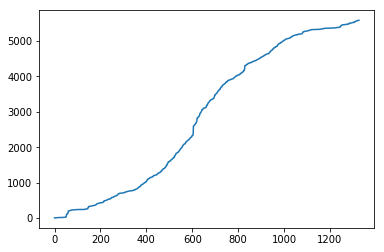

In [69]:
plt.plot(data2['cummBugs'])
plt.show()

In [90]:
x = np.array(data2.day)
y = np.array(data2.cummBugs)

In [98]:
def predict(a,b,x):
    return a * (1 - (1 + b * x) * np.exp(-b * x))

In [99]:
def estimate(X, Y):
    def loss(ds):
        return np.mean((predict(ds[0],ds[1], X) - Y) ** 2)
    return minimize(loss,  [5000., 0.001], tol=1e-25).x

In [100]:
ds = estimate(x,y)
print ds

[  8.54124017e+03   1.85849254e-03]


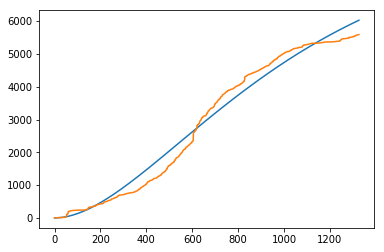

In [101]:
plt.plot(predict(ds[0], ds[1], x))
plt.plot(y)
plt.show()

# Bootstrap Estimations:

In [105]:
exp_len = 900
B = 1000
bs_ds = []
for _ in tqdm(range(B)):
    samp_len = np.random.geometric(1.0/(exp_len + 1.0))
    if samp_len >= len(data2):
        samp_len = len(data2) - 1
    start_ind = np.random.randint(0, len(data2) - samp_len)
    samp_ind = np.array(range(start_ind, start_ind + samp_len))
    x_bs = x[samp_ind]
    y_bs = y[samp_ind]
    bs_ds.append(estimate(x_bs,y_bs))
bs_ds = np.array(bs_ds)

 73%|███████▎  | 729/1000 [00:27<00:10, 26.81it/s]/anaconda2/lib/python2.7/site-packages/scipy/optimize/optimize.py:964: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
100%|██████████| 1000/1000 [00:36<00:00, 27.24it/s]


In [106]:
deltas = ds - bs_ds
deltas_l = np.percentile(deltas, 2.5,axis = 0)
deltas_r = np.percentile(deltas, 97.5,axis = 0)
l_bound = ds - deltas_r
r_bound = ds - deltas_l

In [107]:
pd.DataFrame([{'est': ds[i],
     'l': l_bound[i],
     'r': r_bound[i]} for i in range(2)])

,est,l,r
0,8541.240171,997.769587,1.899618e+06
1,0.001858,0.000087,1.012131e+00
